In [1]:
from data_management.data_collector import DataCollector

In [14]:
from evaluation3 import evaluate_two_datasets, evaluate_models, evaluate_autoencoder, evaluate_translations

In [21]:
from evaluation.numerical_evaluation import do_dimensional_analysis

In [22]:
dc_bw = DataCollector('breastw')

In [10]:
import torch

In [24]:
dim_var, dim_mean, expl_var, expl_mean, expl_per_method, top_feat = do_dimensional_analysis(dc_bw)

torch.Size([1000, 9])
torch.Size([1000, 9])
torch.Size([606, 9])
torch.Size([1000, 9])
torch.Size([1000, 9])


In [25]:
# print(dim_mean)
print(expl_mean[:10])
print(dc_sb.scaled_explanations[0])
print(torch.mean(expl_mean, dim=0))

tensor([[-0.6287,  0.3419,  0.1769, -0.5425, -0.6680],
        [-0.6301,  0.4857,  0.1111, -0.5463, -0.6461],
        [-0.6294,  0.4432,  0.1814,  0.4871, -0.6149],
        [-0.6293,  0.4977,  0.1780,  0.3401, -0.6126],
        [-0.6284,  0.5169,  0.1172, -0.5946, -0.6569],
        [ 0.4614,  0.4309,  0.1940, -0.4956,  0.3879],
        [-0.6213,  0.4004,  0.1787, -0.5380, -0.6686],
        [-0.4988,  0.1277,  0.1468, -0.4740, -0.4506],
        [-0.6302,  0.3910,  0.1337, -0.6184, -0.6569],
        [ 0.4231,  0.3142,  0.1289, -0.3288,  0.3572]])
tensor([ 0.0402, -0.0489,  0.0461, -0.7604, -0.3294, -0.0462, -0.5127, -0.0998,
        -0.0335, -0.1301, -0.3974,  0.1903,  0.0496, -0.1678, -0.2075, -0.2376,
        -0.2210, -0.1011, -0.0118, -0.8681, -0.0934, -0.1629, -0.4808,  0.0251,
         0.8110,  0.5609,  1.0000, -0.0150,  0.2595,  0.2701,  0.2915,  0.1988,
         0.0529,  0.1144,  0.4847, -0.2725,  0.2598, -0.2276,  0.1211,  0.0190,
         0.5604,  0.5461,  0.5876,  0.4709,  0.45

In [5]:
# print(dim_var)
# print(expl_var[:10])
# print(var_per_method)
print(top_feat)

tensor([[   0.,    0.,    0.,   28.,    0.,    0.,   56.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  572.,
            0.,    0.,    0.,    0.,  104.,    0., 1108.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,   18.,    0.,    0.,    0.,  986.,    0.,    0.,    0.,    0.,
            0.,   42.,  732.,    0.,   10.,   26.,    2.],
        [  16.,   26.,   28.,   22.,   98.,   12.,  232.,   38.,   16.,    6.,
           42.,   74.,   40.,   14.,    6.,   86.,   28.,   10.,   16.,   70.,
           28.,   18.,  124.,   60.,  300.,  112.,  230.,   16.,   30.,   16.,
           14.,   10.,   38.,    6.,   28.,   14.,   18.,    2.,    8.,    4.,
           44.,   64.,   28.,   50.,   98.,  122.,   14.,   28.,   14.,    6.,
           20.,  440.,  626.,   12.,   12.,   44.,  106.],
        [ 176.,  176.,   24.,   12.,   74.,    4.,  188.,   26.,   38.,    4.,
           10

In [4]:
import torch

In [6]:
test_array = torch.tensor([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])
print(torch.var(dc_bw.scaled_explanations[0:10, :-1], dim=0))

tensor([0.7111, 0.1493, 0.4078, 0.0448, 0.1282, 0.2774, 0.1318, 0.0976, 0.1532])


In [19]:
dc_bw = DataCollector('breastw')
print(count_lime_features(dc_bw.scaled_explanations[2000:3000]))
dc_sb = DataCollector('spambase')
print(count_lime_features(dc_sb.scaled_explanations[2000:3000]))

tensor([394.,  47.,  55.,  92., 127.,  96.,  84.,  56.,  36.,  13.])
tensor([124., 110.,  54.,  33.,  41.,  36.,  35.,  32.,  20.,  19.,  24.,  23.,
         23.,  14.,  13.,  16.,  19.,  25.,  10.,  13.,  14.,  13.,  11.,  16.,
          8.,   8.,   3.,   4.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 237.])


In [2]:
score_dict_ae165_m3, kfold_dict_ae165_m3 = evaluate_autoencoder(explanation_set='breastw', model_number=3, layers_encode=[9, 5], layers_decode=[5, 9], num_epochs=20, lr=0.005, batch_size=32, eval=False)

In [4]:
print(score_dict_ae165_m3)
print(kfold_dict_ae165_m3)

{'autoencoder mse': {'IG_KS': 0.12995471, 'IG_LI': 0.088640854, 'IG_SG': 0.16035593, 'IG_VG': 0.006372401, 'KS_IG': 0.14828601, 'KS_LI': 0.058443893, 'KS_SG': 0.15884113, 'KS_VG': 0.11546383, 'LI_IG': 0.12801519, 'LI_KS': 0.09119196, 'LI_SG': 0.08025755, 'LI_VG': 0.14597026, 'SG_IG': 0.08301441, 'SG_KS': 0.15423502, 'SG_LI': 0.12083521, 'SG_VG': 0.06628691, 'VG_IG': 0.0020619438, 'VG_KS': 0.12803425, 'VG_LI': 0.09687618, 'VG_SG': 0.1505537}, 'autoencoder mse 6': {'IG_KS': 0.094446376, 'IG_LI': 0.079203814, 'IG_SG': 0.12382569, 'IG_VG': 0.013994165, 'KS_IG': 0.10555712, 'KS_LI': 0.05989643, 'KS_SG': 0.12600814, 'KS_VG': 0.09439654, 'LI_IG': 0.0833933, 'LI_KS': 0.05760751, 'LI_SG': 0.07268078, 'LI_VG': 0.11460209, 'SG_IG': 0.065549955, 'SG_KS': 0.0981102, 'SG_LI': 0.08893633, 'SG_VG': 0.07272436, 'VG_IG': 0.004619679, 'VG_KS': 0.09189875, 'VG_LI': 0.08119221, 'VG_SG': 0.119889714}, 'autoencoder mse 3': {'IG_KS': 0.21993431, 'IG_LI': 0.1289852, 'IG_SG': 0.113465026, 'IG_VG': 0.025029367, 

In [6]:
from evaluation.linear_translator import calculate_distance_to_baseline, calculate_percentage_of_baseline
from visualization.translator_fig import visualize_multiple_scores, show_rankings_bp
from evaluation.ranking import merge_rankings, separate_concepts

In [8]:
from data_management.data_saving import save_dict, load_dict

In [5]:
save_dict(score_dict_ae165_m3, 'saves/bw/score_dict_ae165_20_01_16_m3.pkl')

In [6]:
score_dict_ae84_m3 = evaluate_autoencoder(explanation_set='breastw',model_number=3, layers_encode=[9, 8, 4], layers_decode=[4, 8, 9], num_epochs=20, lr=0.01, batch_size=16, eval=False)

In [7]:
save_dict(score_dict_ae84_m3, 'saves/bw/score_dict_ae84_20_01_16_m3.pkl')

In [1]:
from evaluation3 import evaluate_ae_lr_models

In [2]:
dict_m2, perc_m2 = evaluate_ae_lr_models('breastw', masking=2, show=False)

{'IG_KS': 0.16090758439089353, 'IG_LI': 0.12301894866617435, 'IG_SG': 0.17143058565024719, 'IG_VG': 0.2679787159550666, 'KS_IG': 0.28726474486753323, 'KS_LI': 0.12301894866617435, 'KS_SG': 0.17143058565024719, 'KS_VG': 0.2679787159550666, 'LI_IG': 0.31821687180476693, 'LI_KS': 0.1886849920874391, 'LI_SG': 0.09359380133425765, 'LI_VG': 0.3006424572558088, 'SG_IG': 0.28726474486753323, 'SG_KS': 0.16090758439089353, 'SG_LI': 0.12301894866617435, 'SG_VG': 0.2679787159550666, 'VG_IG': 0.28726474486753323, 'VG_KS': 0.16090758439089353, 'VG_LI': 0.12301894866617435, 'VG_SG': 0.17143058565024719}


In [3]:
dict_m1, perc_m1 = evaluate_ae_lr_models('breastw', masking=1, show=False)

{'IG_KS': 0.16090758439089353, 'IG_LI': 0.12301894866617435, 'IG_SG': 0.17143058565024719, 'IG_VG': 0.2679787159550666, 'KS_IG': 0.28726474486753323, 'KS_LI': 0.12301894866617435, 'KS_SG': 0.17143058565024719, 'KS_VG': 0.2679787159550666, 'LI_IG': 0.31821687180476693, 'LI_KS': 0.1886849920874391, 'LI_SG': 0.09359380133425765, 'LI_VG': 0.3006424572558088, 'SG_IG': 0.28726474486753323, 'SG_KS': 0.16090758439089353, 'SG_LI': 0.12301894866617435, 'SG_VG': 0.2679787159550666, 'VG_IG': 0.28726474486753323, 'VG_KS': 0.16090758439089353, 'VG_LI': 0.12301894866617435, 'VG_SG': 0.17143058565024719}


In [4]:
dict_m0, perc_m0 = evaluate_ae_lr_models('breastw', masking=0, show=False)

{'IG_KS': 0.16090758439089353, 'IG_LI': 0.12301894866617435, 'IG_SG': 0.17143058565024719, 'IG_VG': 0.2679787159550666, 'KS_IG': 0.28726474486753323, 'KS_LI': 0.12301894866617435, 'KS_SG': 0.17143058565024719, 'KS_VG': 0.2679787159550666, 'LI_IG': 0.31821687180476693, 'LI_KS': 0.1886849920874391, 'LI_SG': 0.09359380133425765, 'LI_VG': 0.3006424572558088, 'SG_IG': 0.28726474486753323, 'SG_KS': 0.16090758439089353, 'SG_LI': 0.12301894866617435, 'SG_VG': 0.2679787159550666, 'VG_IG': 0.28726474486753323, 'VG_KS': 0.16090758439089353, 'VG_LI': 0.12301894866617435, 'VG_SG': 0.17143058565024719}


In [5]:
from evaluation.ranking import merge_two_dicts

In [6]:
perc_m1 = {key + ' 1/3': value for key, value in perc_m1.items()}
perc_m2 = {key + ' 2/3': value for key, value in perc_m2.items()}
print(perc_m1.keys())

dict_keys(['165 m1 1/3', '85 m1 1/3', 'lr m1 1/3', '165 m2 1/3', '85 m2 1/3', 'lr m2 1/3', '165 m3 1/3', '85 m3 1/3', 'lr m3 1/3', 'baseline 1/3'])


In [11]:
compare_perc = {
                '16-5 1/3 masked': perc_m1['165 m1 1/3'],
                '16-5 2/3 masked': perc_m2['165 m2 2/3'],}

# '16-5 no mask': perc_m0['165 m1'],

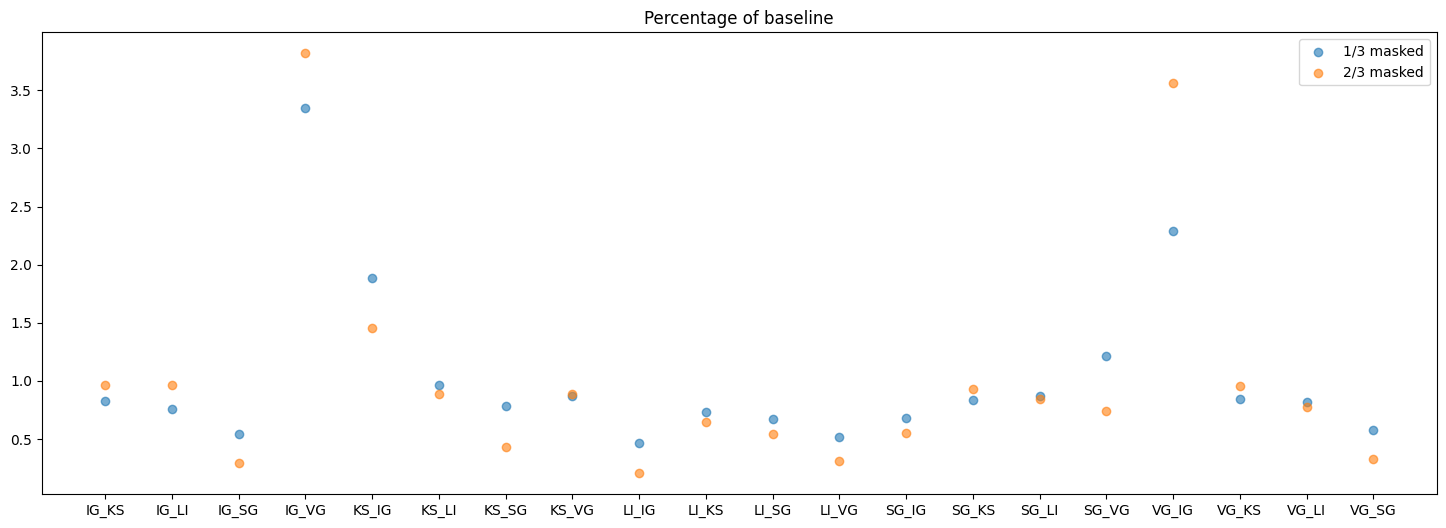

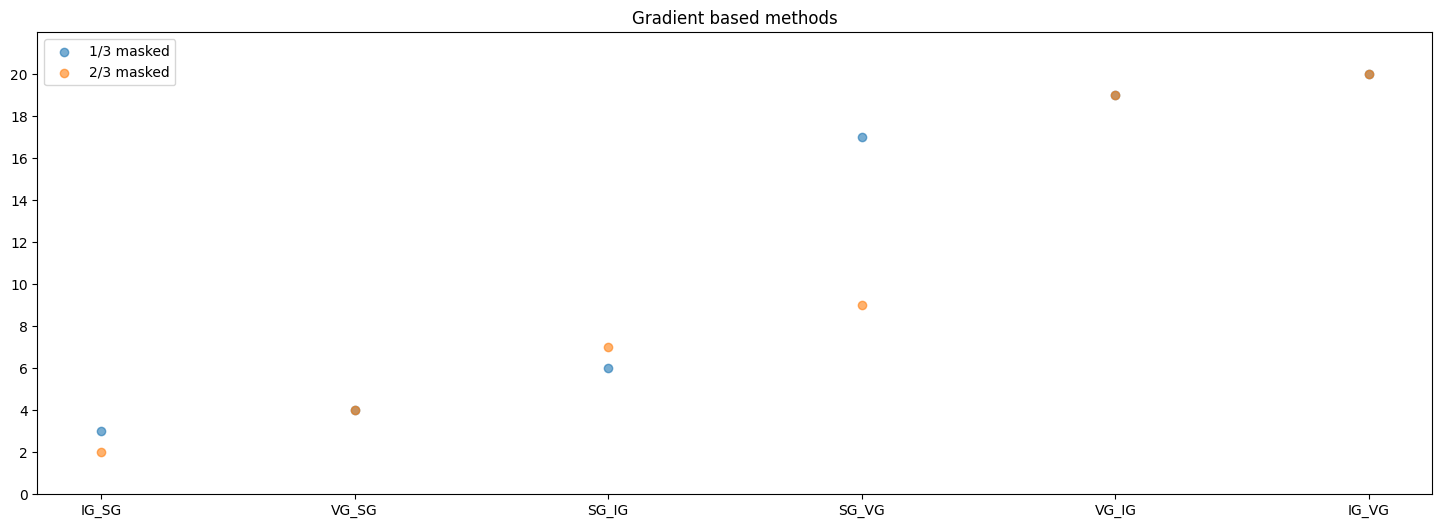

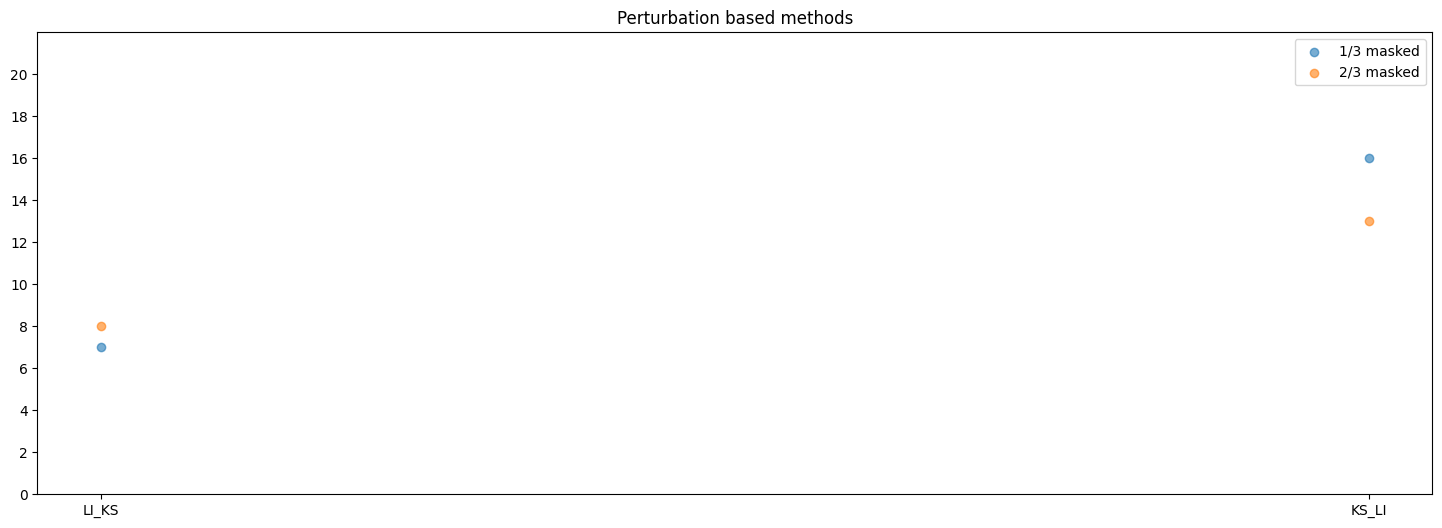

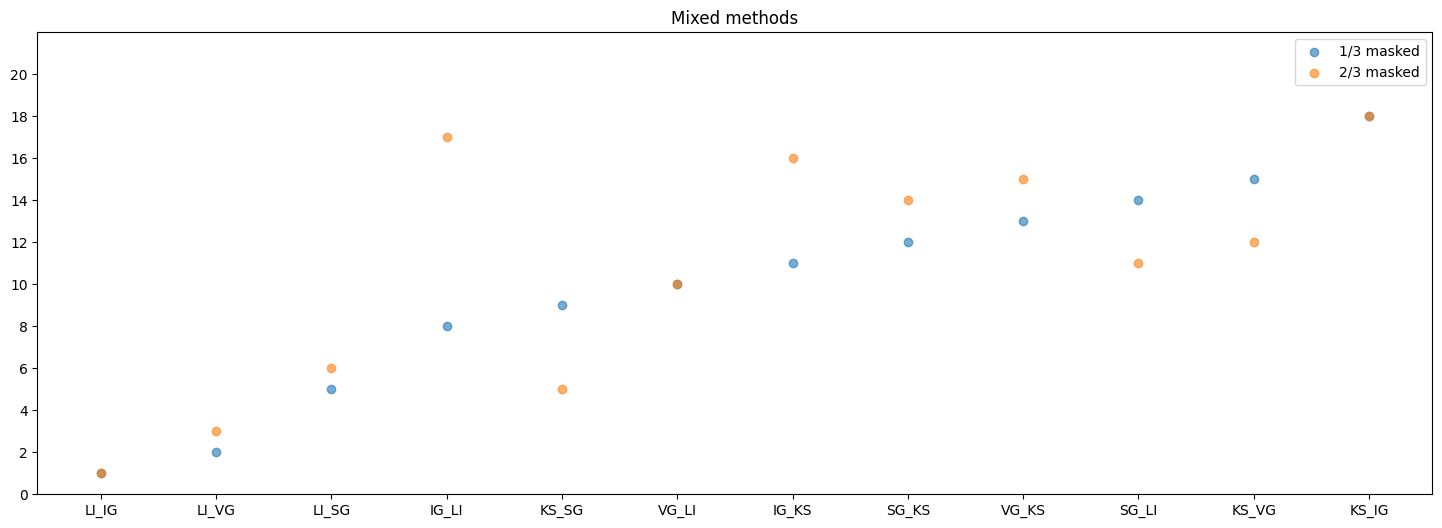

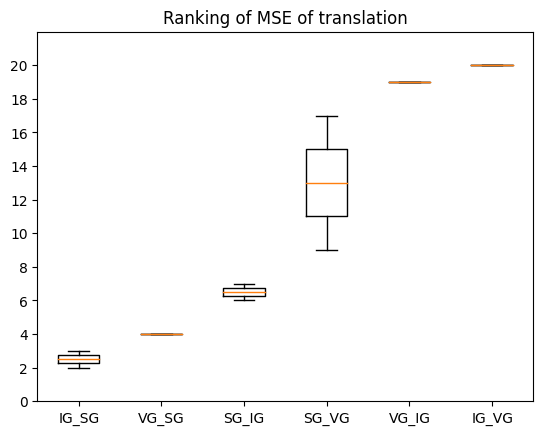

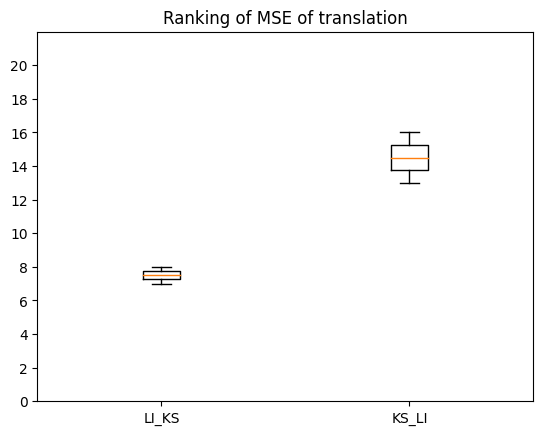

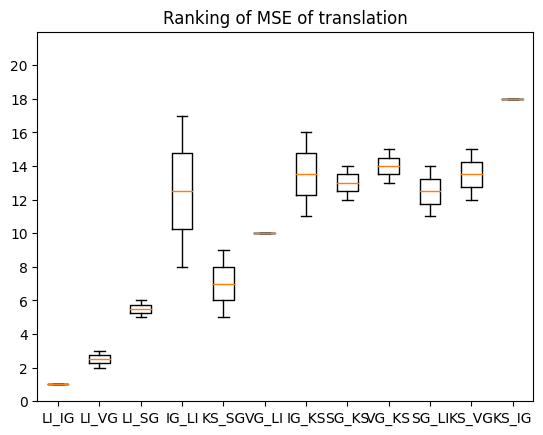

10.833333333333334
11.0
10.25


In [13]:
evaluate_translations(compare_perc, ('1/3 masked', '2/3 masked'), 'Percentage of baseline')

In [12]:
perc_1 = merge_two_dicts(perc_m0, perc_m1)
perc_2 = merge_two_dicts(perc_1, perc_m2)
print(perc_2.keys())

dict_keys(['165 m1', '85 m1', 'lr m1', '165 m2', '85 m2', 'lr m2', '165 m3', '85 m3', 'lr m3', '165 m11/3', '85 m11/3', 'lr m11/3', '165 m21/3', '85 m21/3', 'lr m21/3', '165 m31/3', '85 m31/3', 'lr m31/3', '165 m12/3', '85 m12/3', 'lr m12/3', '165 m22/3', '85 m22/3', 'lr m22/3', '165 m32/3', '85 m32/3', 'lr m32/3'])


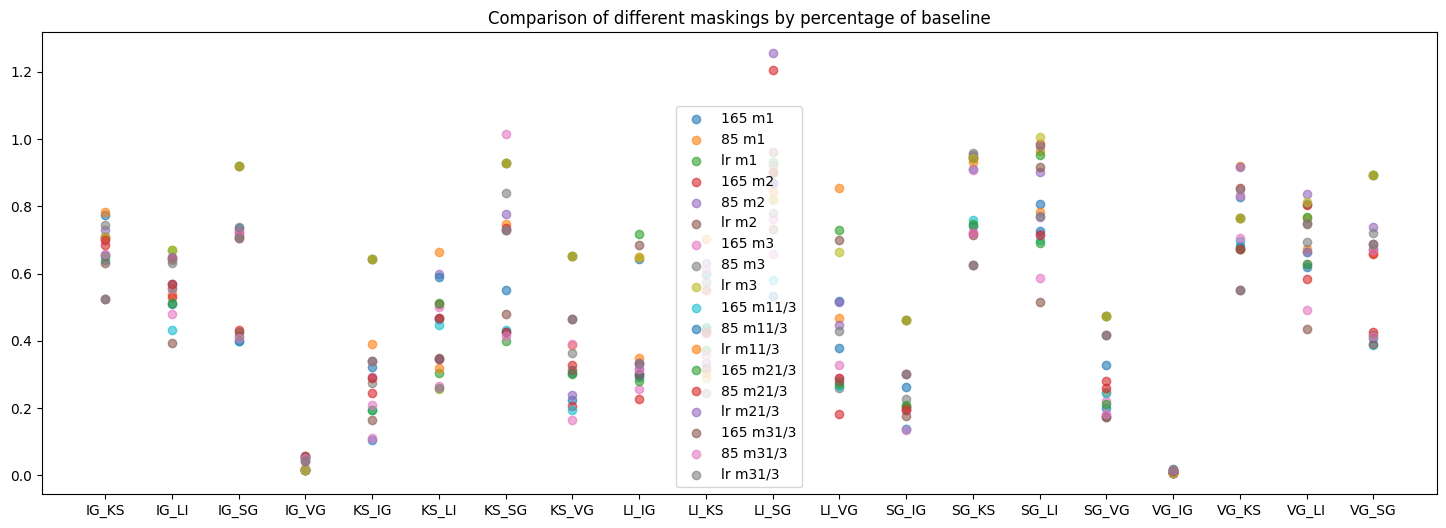

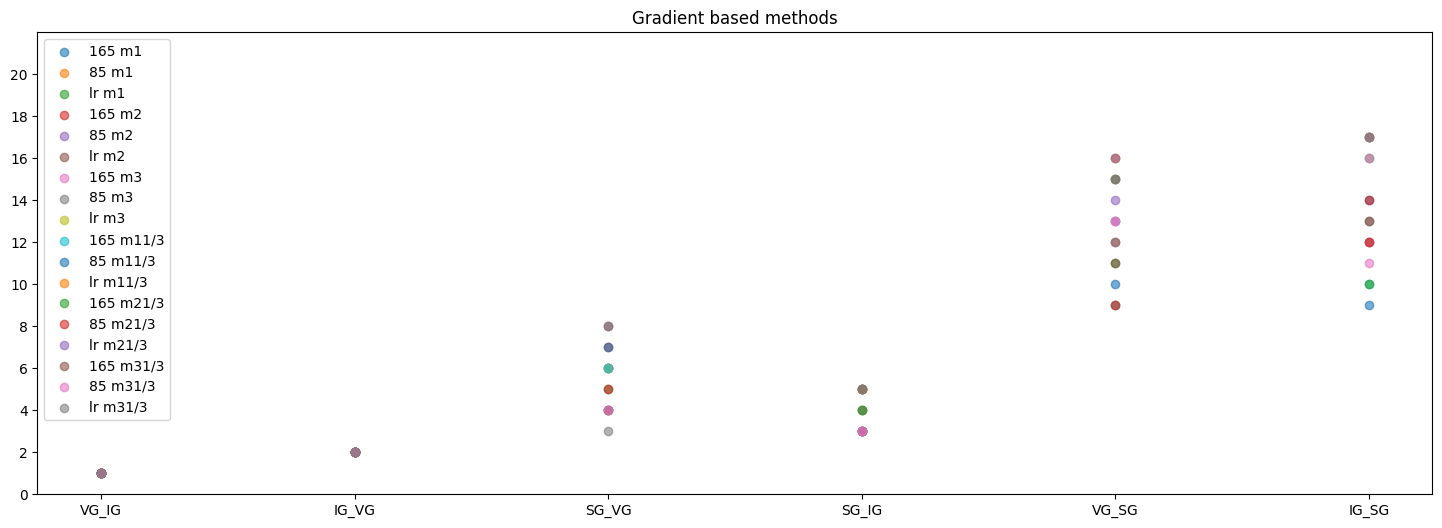

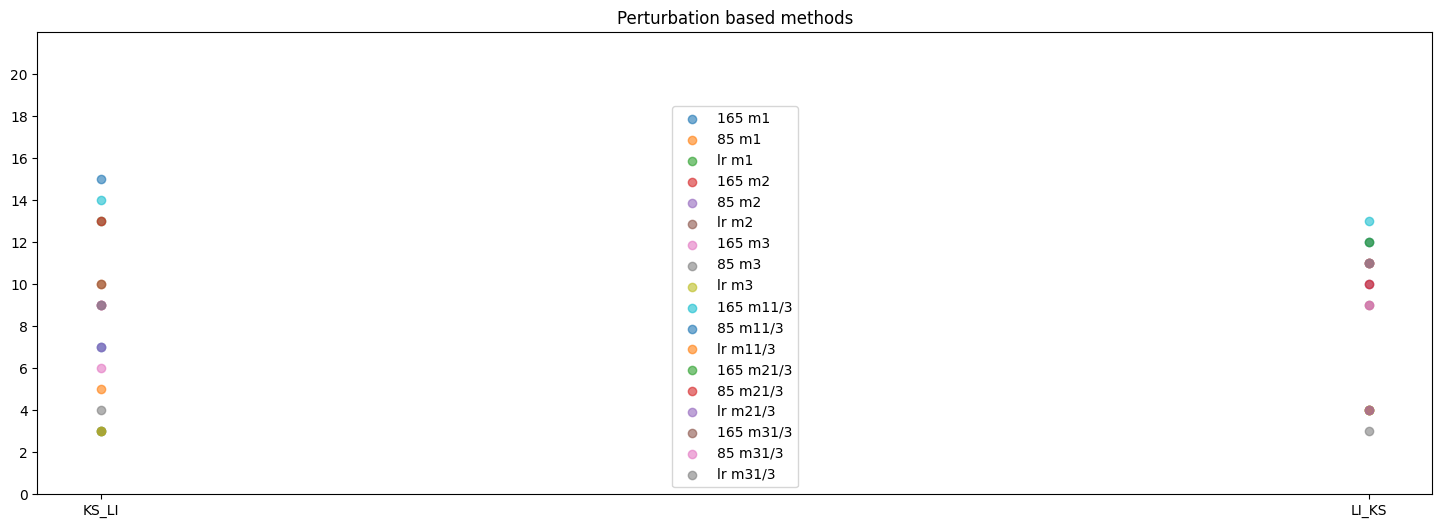

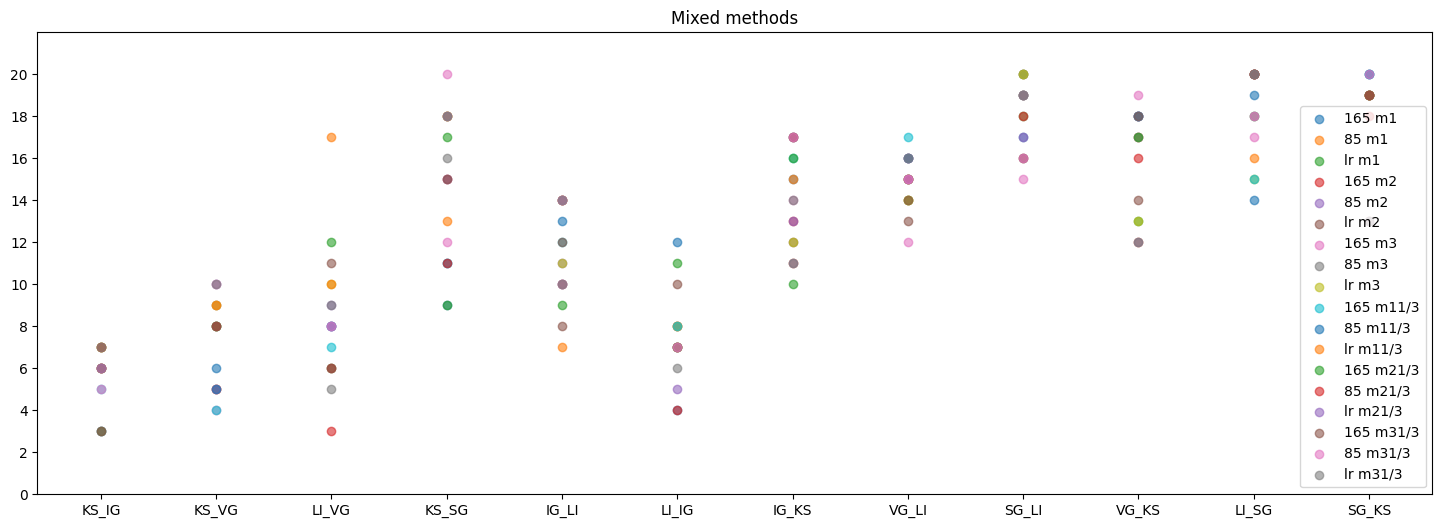

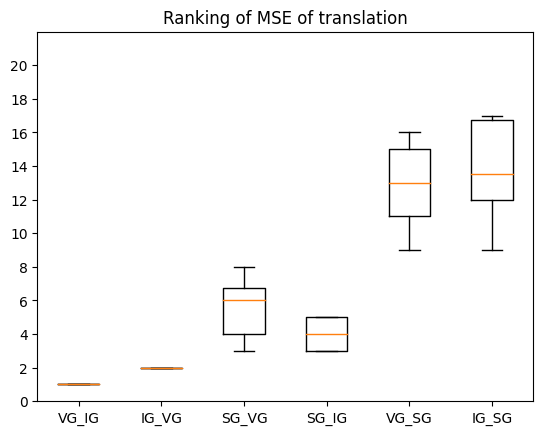

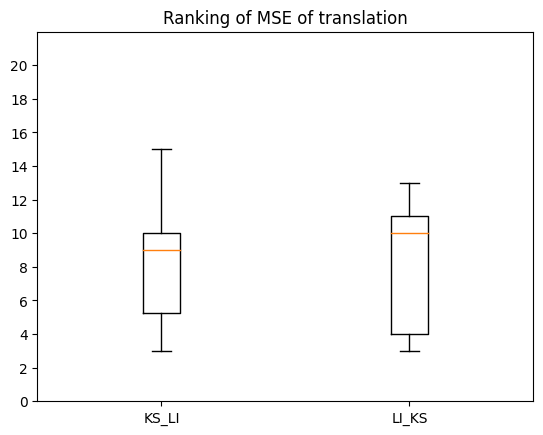

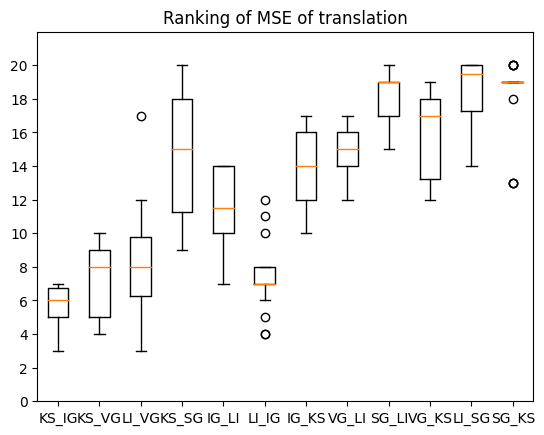

6.5
8.38888888888889
12.851851851851851


In [15]:
evaluate_translations(perc_1, ('165 m1', '85 m1', 'lr m1', '165 m2', '85 m2', 'lr m2', '165 m3', '85 m3', 'lr m3', '165 m11/3', '85 m11/3', 'lr m11/3', '165 m21/3', '85 m21/3', 'lr m21/3', '165 m31/3', '85 m31/3', 'lr m31/3'), 'Comparison of different maskings by percentage of baseline')

{'IG_KS': 0.0870445605667342, 'IG_LI': 0.028980327040693702, 'IG_SG': 0.14405154984791166, 'IG_VG': 0.1485404048348404, 'KS_IG': 0.14618146150727787, 'KS_LI': 0.028980327040693702, 'KS_SG': 0.14405154984791166, 'KS_VG': 0.1485404048348404, 'LI_IG': 0.1504865803413914, 'LI_KS': 0.07929285236337326, 'LI_SG': 0.14456503998315506, 'LI_VG': 0.15118460599846403, 'SG_IG': 0.14618146150727787, 'SG_KS': 0.0870445605667342, 'SG_LI': 0.028980327040693702, 'SG_VG': 0.1485404048348404, 'VG_IG': 0.14618146150727787, 'VG_KS': 0.0870445605667342, 'VG_LI': 0.028980327040693702, 'VG_SG': 0.14405154984791166}


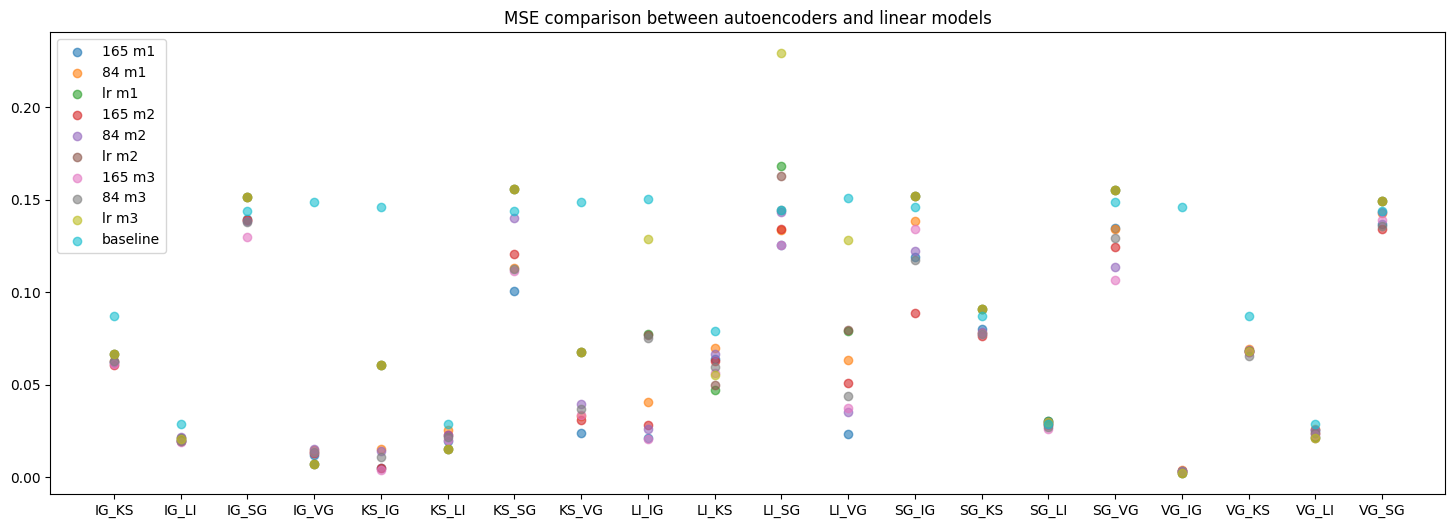

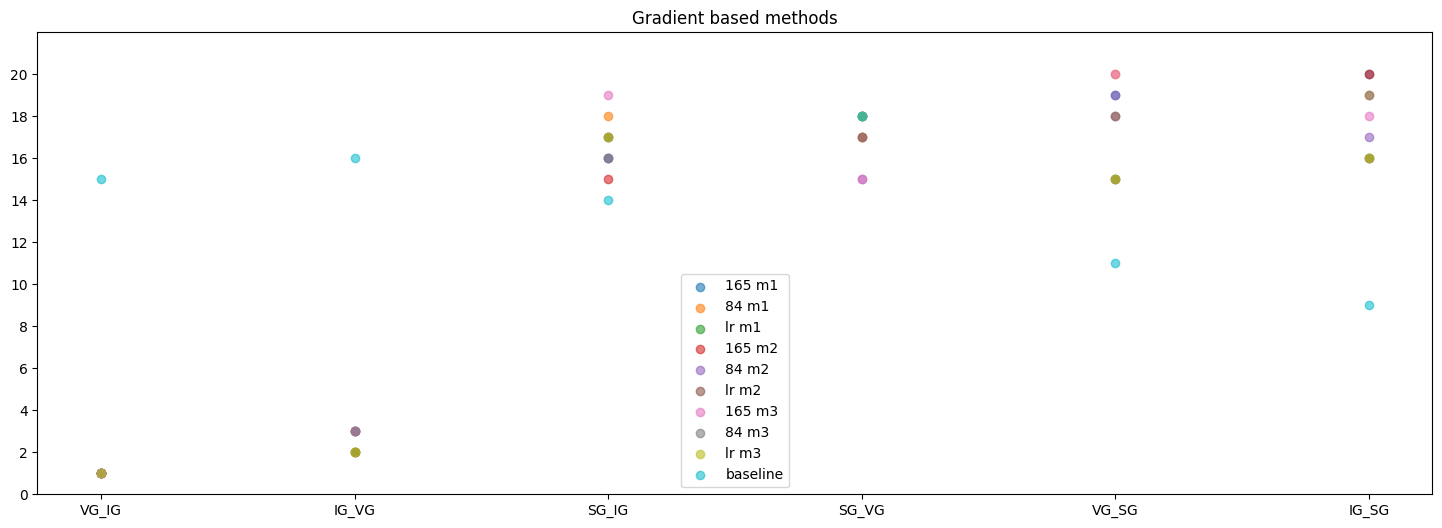

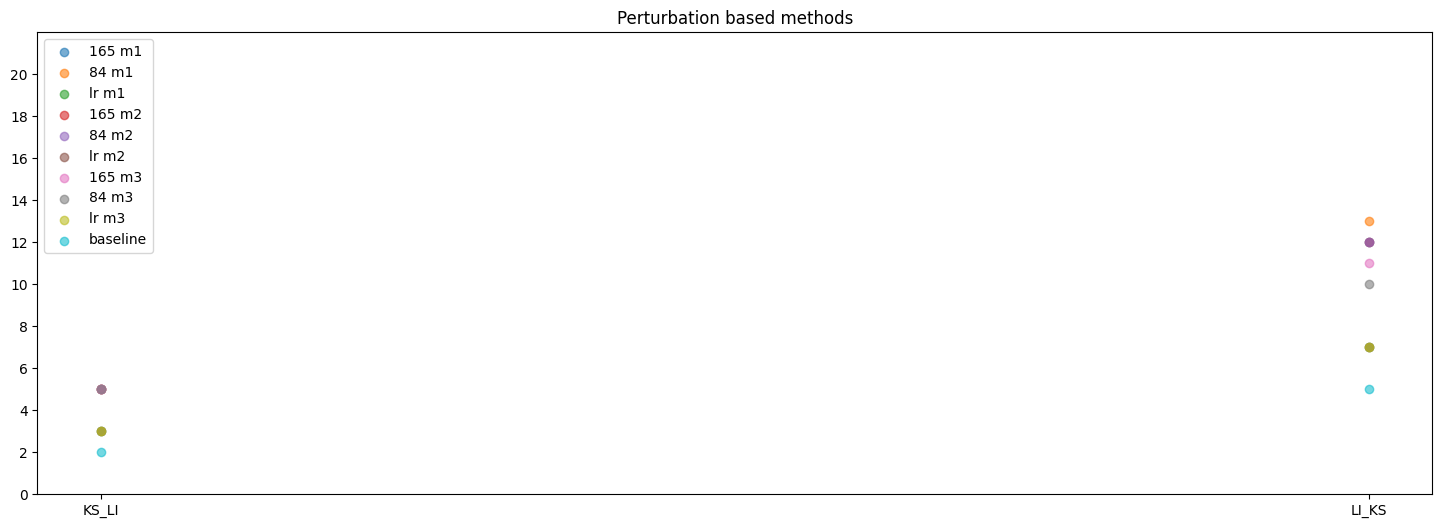

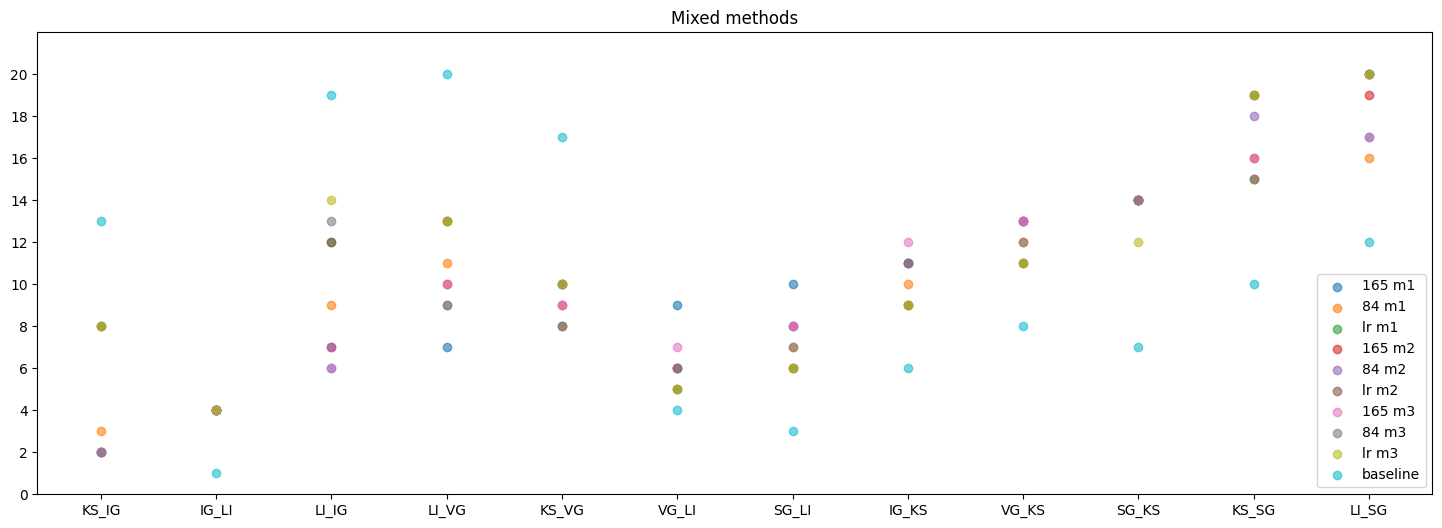

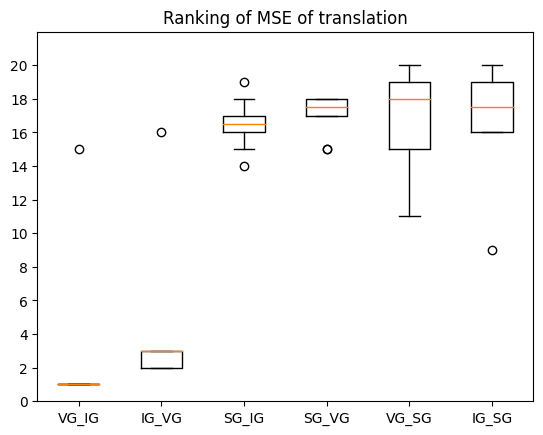

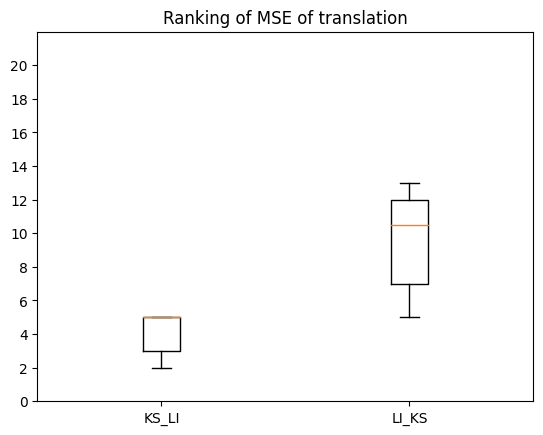

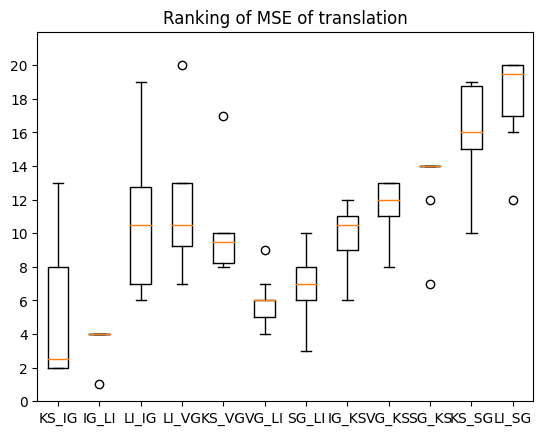

12.316666666666666
6.85
10.2


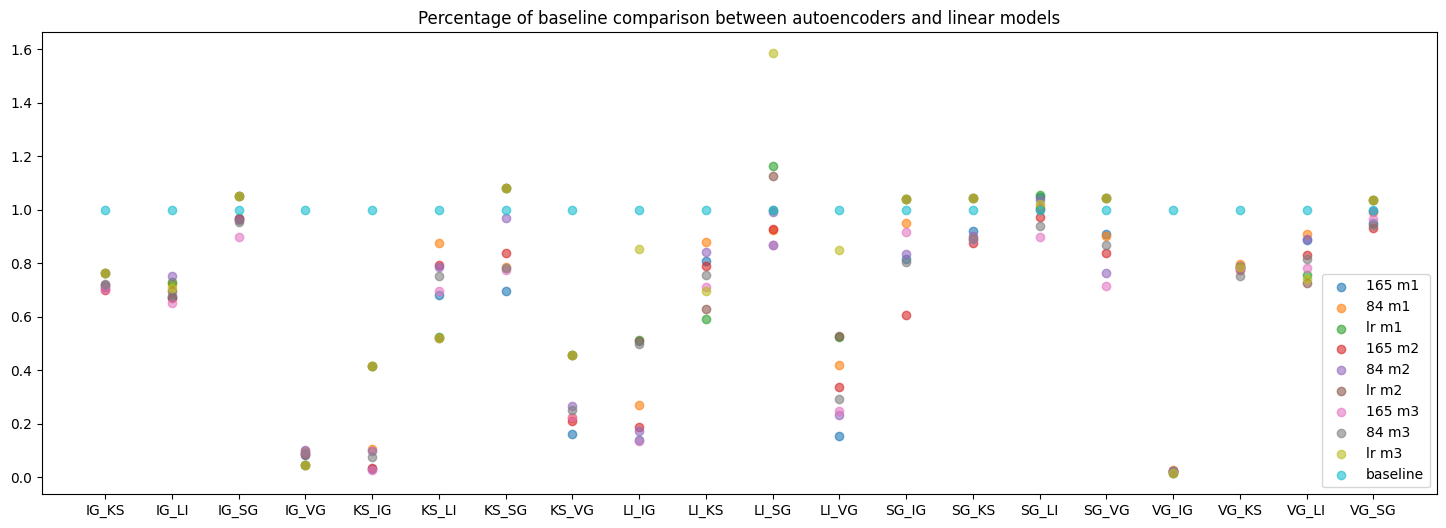

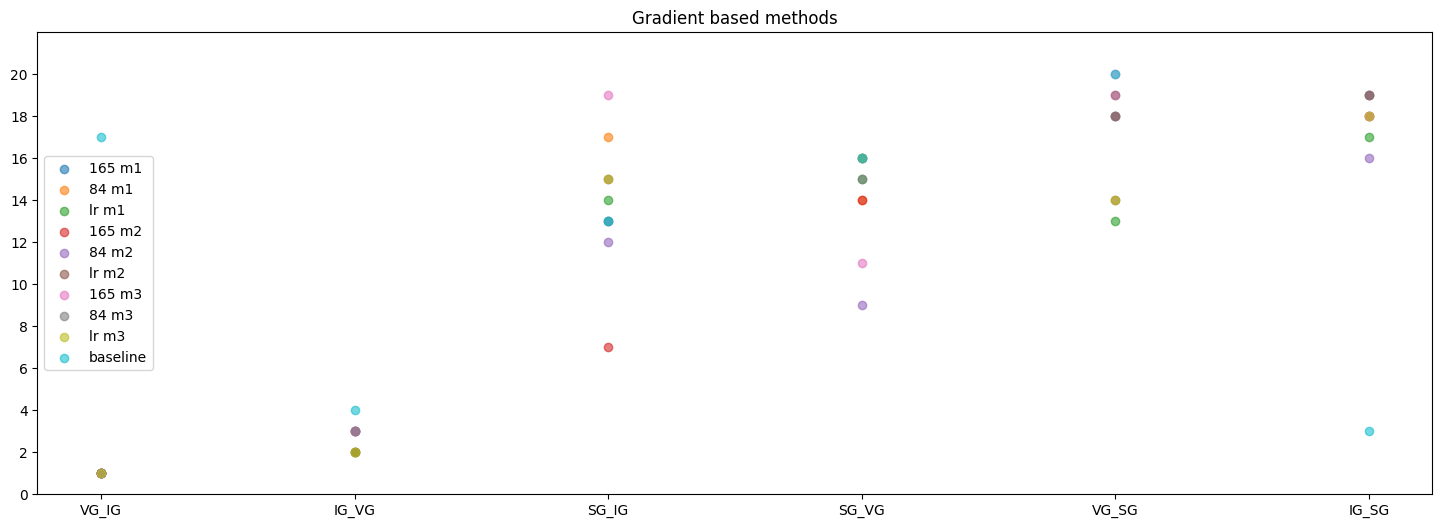

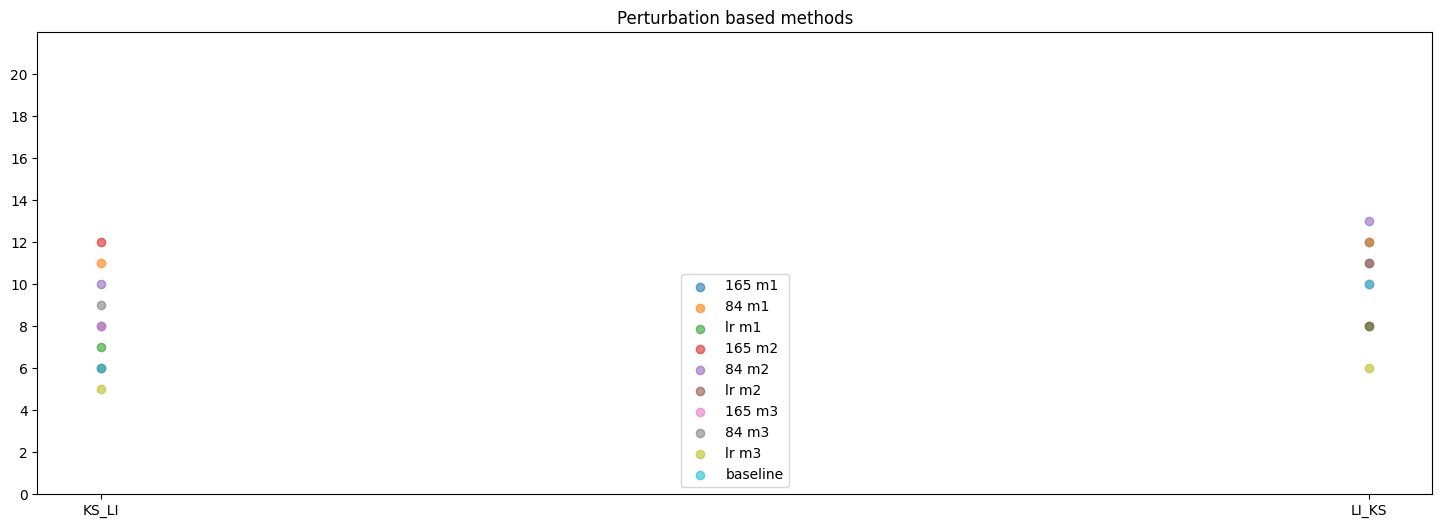

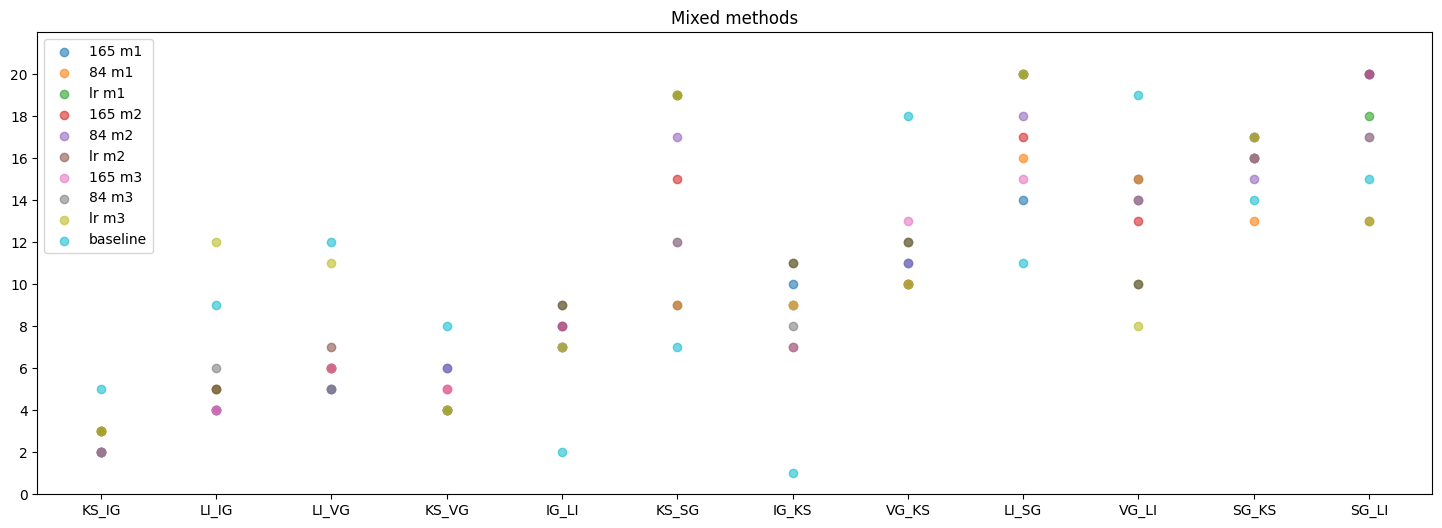

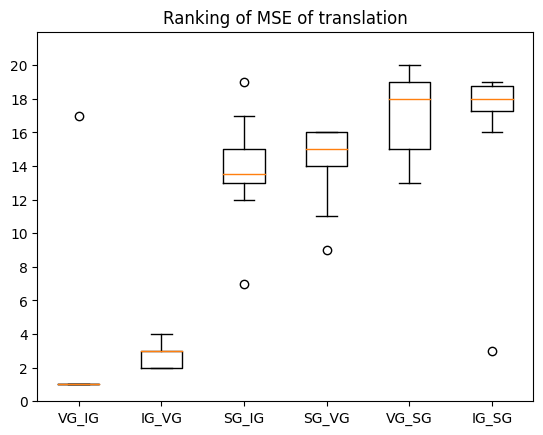

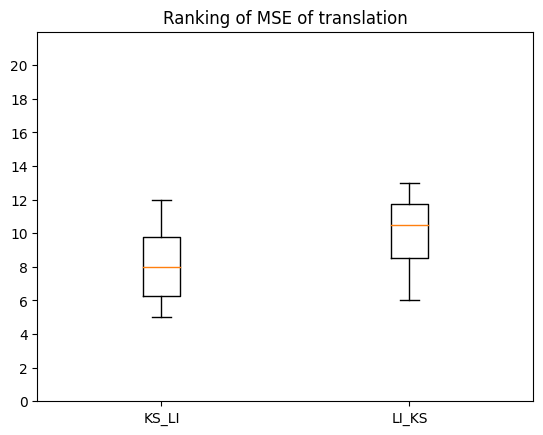

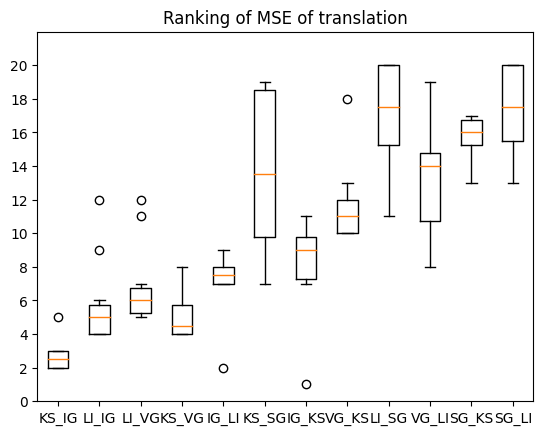

11.183333333333334
9.15
10.383333333333333


({'165 m1': {'IG_KS': 0.0620316,
   'IG_LI': 0.019534247,
   'IG_SG': 0.13985722,
   'IG_VG': 0.012204858,
   'KS_IG': 0.0047311867,
   'KS_LI': 0.019719135,
   'KS_SG': 0.100509755,
   'KS_VG': 0.024116112,
   'LI_IG': 0.02114405,
   'LI_KS': 0.064065546,
   'LI_SG': 0.12555137,
   'LI_VG': 0.023287281,
   'SG_IG': 0.11924084,
   'SG_KS': 0.080017716,
   'SG_LI': 0.030372921,
   'SG_VG': 0.1348733,
   'VG_IG': 0.0035981853,
   'VG_KS': 0.06817598,
   'VG_LI': 0.02575326,
   'VG_SG': 0.13677314},
  '85 m1': {'IG_KS': 0.06262873,
   'IG_LI': 0.02094429,
   'IG_SG': 0.13889295,
   'IG_VG': 0.0147966305,
   'KS_IG': 0.015351743,
   'KS_LI': 0.025333857,
   'KS_SG': 0.113091685,
   'KS_VG': 0.033084624,
   'LI_IG': 0.0408069,
   'LI_KS': 0.06985171,
   'LI_SG': 0.13352428,
   'LI_VG': 0.0632946,
   'SG_IG': 0.13873862,
   'SG_KS': 0.07800538,
   'SG_LI': 0.029334065,
   'SG_VG': 0.13399756,
   'VG_IG': 0.003704007,
   'VG_KS': 0.06937224,
   'VG_LI': 0.02633542,
   'VG_SG': 0.14276333},
  

In [3]:
evaluate_ae_lr_models('spambase')

In [41]:
score_dict_ae85_m3 = evaluate_autoencoder(explanation_set='spambase',model_number=3, layers_encode=[57, 8, 4], layers_decode=[4, 8, 57], num_epochs=20, lr=0.01, batch_size=16, eval=False)

In [42]:
save_dict(score_dict_ae85_m3, 'saves/score_dict_ae85_20_01_16_m3.pkl')

In [3]:
dc_sb = DataCollector('spambase')
dc_bw = DataCollector('breastw')


In [4]:
dc_bw.mask_features(6, 0, True)
dc_bw.masked_explanations[100:110]

tensor([[ 0.0000, -0.5953,  0.0000, -0.3598, -0.4796,  0.0000, -0.4364, -0.5554,
         -0.5835,  0.0000],
        [ 0.0000,  0.2227,  0.0000,  0.1269,  0.3161,  0.0000,  0.3634,  0.1897,
          0.4442,  0.0000],
        [ 0.0000, -0.6001,  0.0000, -0.3637, -0.4794,  0.0000, -0.4404, -0.5556,
         -0.5830,  0.0000],
        [ 0.0000, -0.5900,  0.0000, -0.3595, -0.4915,  0.0000, -0.4253, -0.5616,
         -0.5842,  0.0000],
        [ 0.0000, -0.5868,  0.0000, -0.3726, -0.5035,  0.0000, -0.4182, -0.5575,
         -0.6421,  0.0000],
        [ 0.0000, -0.5898,  0.0000, -0.3597, -0.4894,  0.0000, -0.4268, -0.5617,
         -0.5838,  0.0000],
        [ 0.0000, -0.6126,  0.0000, -0.3619, -0.4742,  0.0000, -0.4423, -0.5413,
         -0.5712,  0.0000],
        [ 0.0000,  0.2240,  0.0000,  0.1201,  0.2610,  0.0000,  0.4113,  0.1613,
          0.3581,  0.0000],
        [ 0.0000, -0.5965,  0.0000, -0.3629, -0.5066,  0.0000, -0.4328, -0.5631,
         -0.5860,  0.0000],
        [ 0.0000, -

In [5]:
from evaluation.linear_translator import translate_kfold
import torch
import numpy as np

In [6]:
index_list = dc_bw.find_lime_zero_explanations()
non_index_list = [i for i in range(0, 1000) if i not in index_list]


In [7]:
from evaluation.numerical_evaluation import calculate_variance

In [8]:
print(calculate_variance(dc_bw.scaled_explanations, False, True))

{0: tensor([0.8843, 0.1680, 0.4737, 0.0551, 0.1356, 0.3657, 0.1584, 0.1224, 0.2247]), 1: tensor([0.3612, 0.1104, 0.1815, 0.0858, 0.1126, 0.1995, 0.1382, 0.1313, 0.1291]), 2: tensor([0.2503, 0.0159, 0.1737, 0.0049, 0.0281, 0.1721, 0.0648, 0.0287, 0.0475]), 3: tensor([0.5303, 0.0927, 0.1992, 0.0502, 0.0703, 0.2421, 0.1437, 0.0796, 0.1363]), 4: tensor([0.6151, 0.1277, 0.4458, 0.0636, 0.1123, 0.4575, 0.1550, 0.1387, 0.2985])}


In [9]:
from evaluation.linear_translator import compare_to_mean_baseline


In [10]:
from evaluation.linear_translator import translate, translate_pairwise
import numpy as np
# from sklearn.metrics import mean_squared_error

In [11]:
r2_scaled, mse_scaled, mse_baseline, variance = translate_pairwise(dc_bw.scaled_explanations, dc_bw.non_zero_explanations)
masked_indices3, masked_indices_non_zero3 = dc_bw.mask_features(3, 0, True)
r2_masked3, mse_masked3, mse_baseline3, variance3 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices3, non_zero_masked_indices=masked_indices_non_zero3)
masked_indices6, masked_indices_non_zero6 = dc_bw.mask_features(6, 0, True)
r2_masked6, mse_masked6, mse_baseline6, variance6 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices6, non_zero_masked_indices=masked_indices_non_zero6)

In [12]:
from evaluation.autoencoder_training import translate_with_autoencoder
from evaluation.autoencoder import Autoencoder

In [13]:
ae = Autoencoder(9, 6)
mse_ae = translate_with_autoencoder(ae, dc_bw.scaled_explanations, dc_bw.non_zero_explanations, lr=0.01, batch_size=16)

KeyboardInterrupt: 

In [ ]:
from visualization.translator_fig import visualize_translation_scores, visualize_multiple_scores

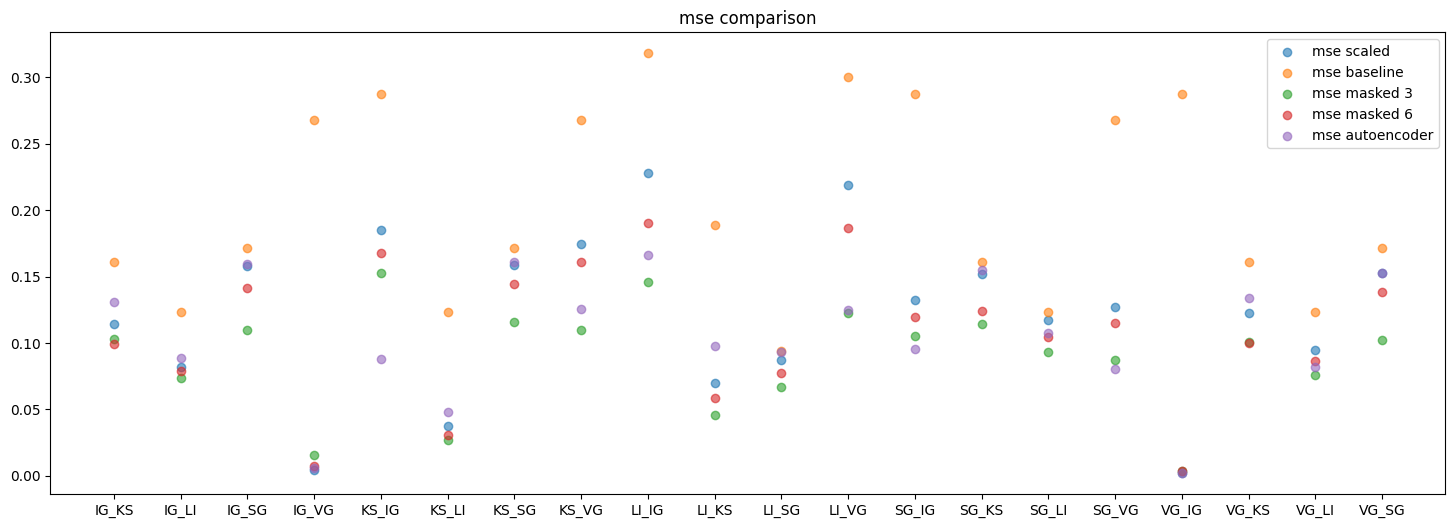

In [ ]:
score_dict = {'mse_scaled': mse_scaled, 'mse_baseline': mse_baseline, 'mse_masked3': mse_masked3, 'mse_masked6': mse_masked6, 'mse_ae': mse_ae}
visualize_multiple_scores(score_dict, ('mse scaled', 'mse baseline', 'mse masked 3', 'mse masked 6', 'mse autoencoder'), 'mse comparison')

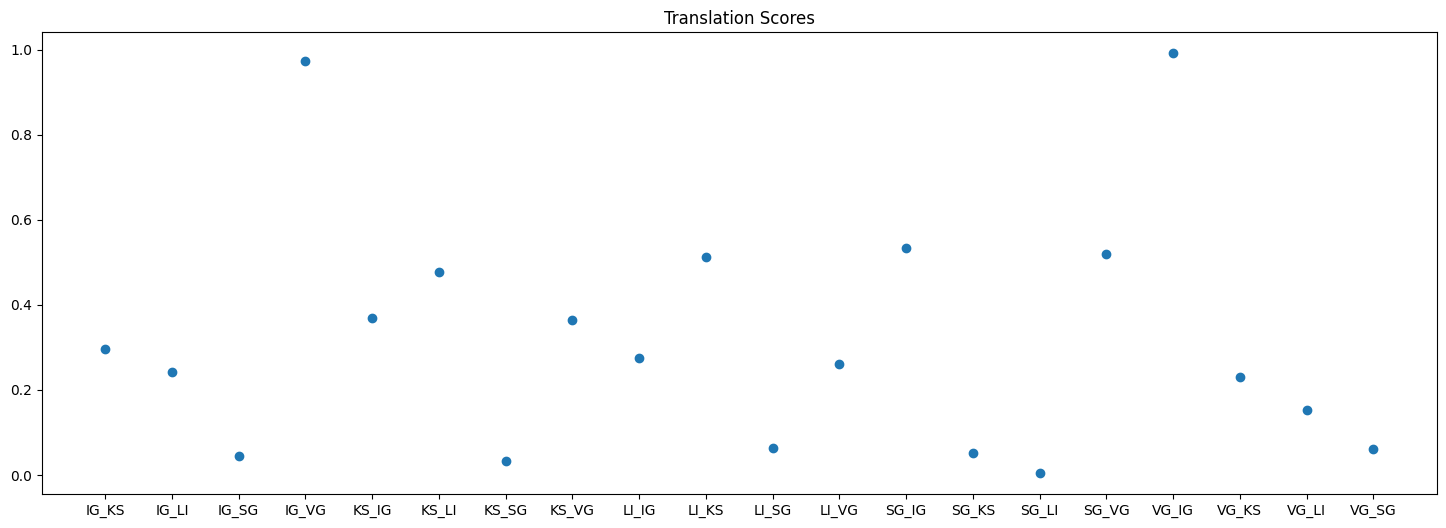

In [ ]:
visualize_translation_scores(r2_scaled)

In [ ]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')

TypeError: visualize_multiple_scores() takes from 3 to 4 positional arguments but 5 were given

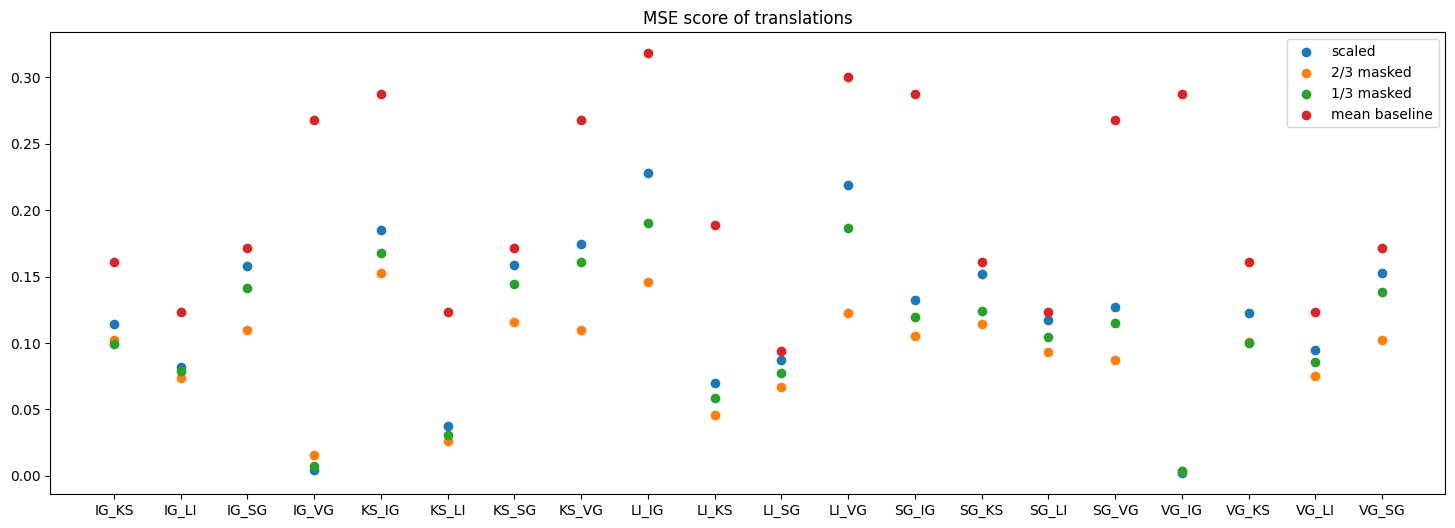

In [ ]:
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.ranking import merge_dictionaries, create_rankings
from visualization.translator_fig import show_rankings

In [ ]:
mse_scaled_ranking = create_rankings(mse_scaled)
mse_masked3_ranking = create_rankings(mse_masked3)
mse_masked6_ranking = create_rankings(mse_masked6)

In [ ]:
merged_dict = merge_dictionaries(mse_scaled_ranking, mse_masked3_ranking, mse_masked6_ranking)  
show_rankings(merged_dict)

TypeError: show_rankings() missing 1 required positional argument: 'label'

In [ ]:
from evaluation.ranking import separate_concepts

In [ ]:
grad_dict, perturb_dict, mixed_dict = separate_concepts(merged_dict)

NameError: name 'merged_dict' is not defined

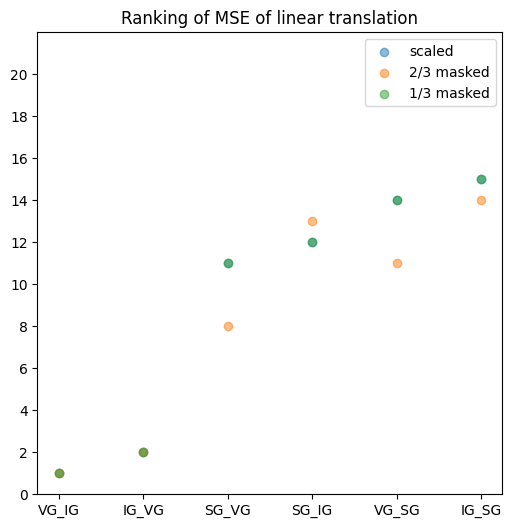

In [ ]:
show_rankings(grad_dict, figsize=(6, 6))

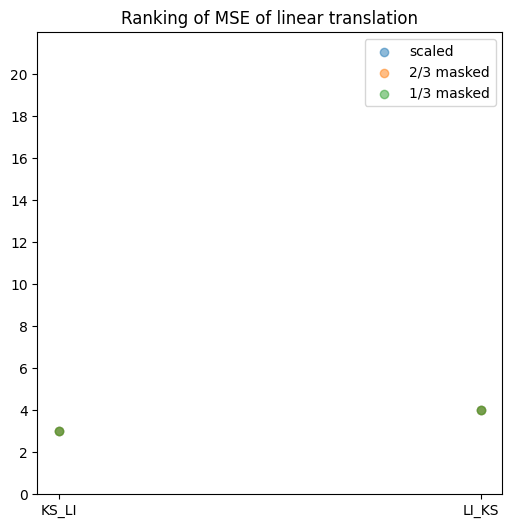

In [ ]:
show_rankings(perturb_dict, figsize=(6,6))

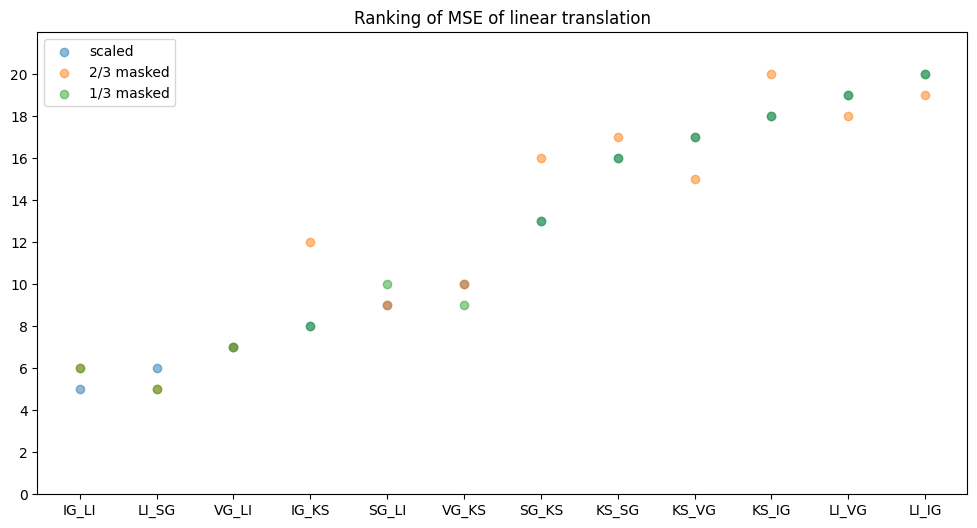

In [ ]:
show_rankings(mixed_dict, figsize=(12,6))

In [4]:
print(np.mean(list(grad_dict.values())))
print(np.mean(list(perturb_dict.values())))
print(np.mean(list(mixed_dict.values())))

NameError: name 'np' is not defined

In [ ]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_sb.scaled_explanations, dc_sb.non_zero_explanations)
dc_sb.mask_features(19, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)
dc_sb.mask_features(38, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)

In [ ]:
visualize_translation_scores(r2_scaled)
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

NameError: name 'visualize_translation_scores' is not defined

In [ ]:
dc_spf = DataCollector('spf')
dc_spf.create_non_zero_dataset()

tensor([[-4.5482e-01, -6.1059e-02, -5.7879e-02,  ...,  7.2226e-02,
         -2.7875e-01,  0.0000e+00],
        [-2.5703e-01,  1.1847e-01, -2.6198e-01,  ...,  8.0506e-01,
          1.2969e-01,  0.0000e+00],
        [ 7.2509e-02, -6.8391e-02, -5.1678e-01,  ...,  4.7175e-02,
         -2.9617e-02,  0.0000e+00],
        ...,
        [-4.7016e-01, -9.7888e-01,  2.8577e-01,  ..., -5.0615e-01,
         -3.2090e-01,  4.0000e+00],
        [-4.2756e-01, -8.8650e-01,  1.1033e-01,  ..., -1.9538e-01,
          7.0556e-02,  4.0000e+00],
        [-3.1797e-03,  3.9915e-01,  1.2019e-01,  ...,  3.6589e-01,
          3.4891e-01,  4.0000e+00]])

In [ ]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_spf.scaled_explanations, dc_spf.non_zero_explanations)
dc_spf.mask_features(8, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)
dc_spf.mask_features(16, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)

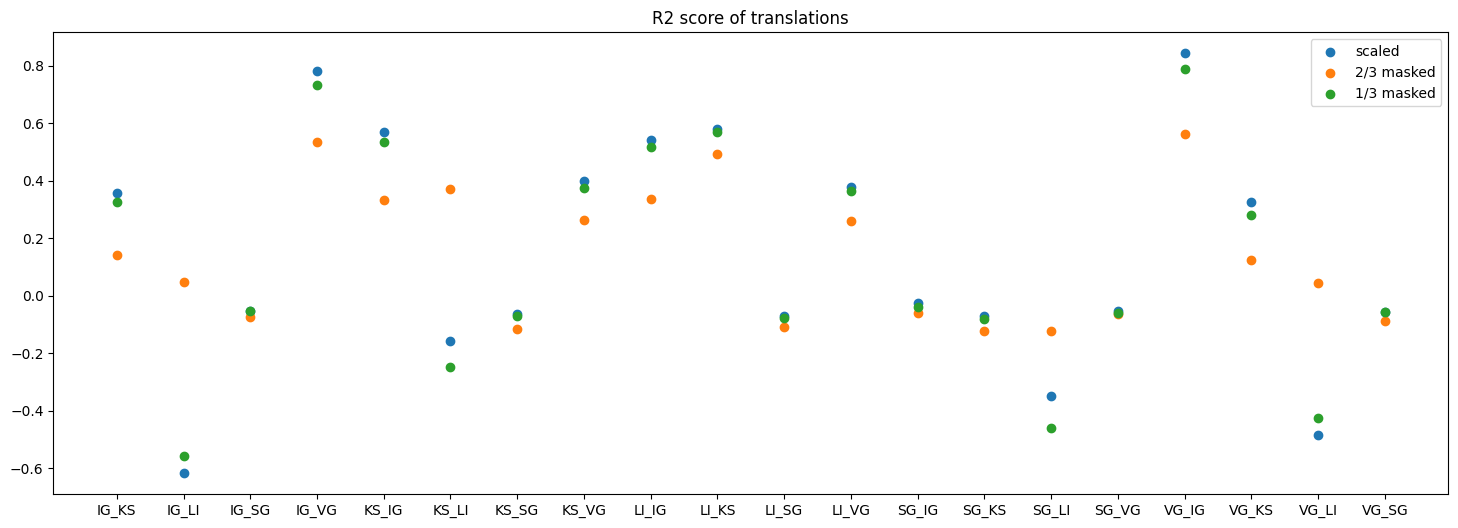

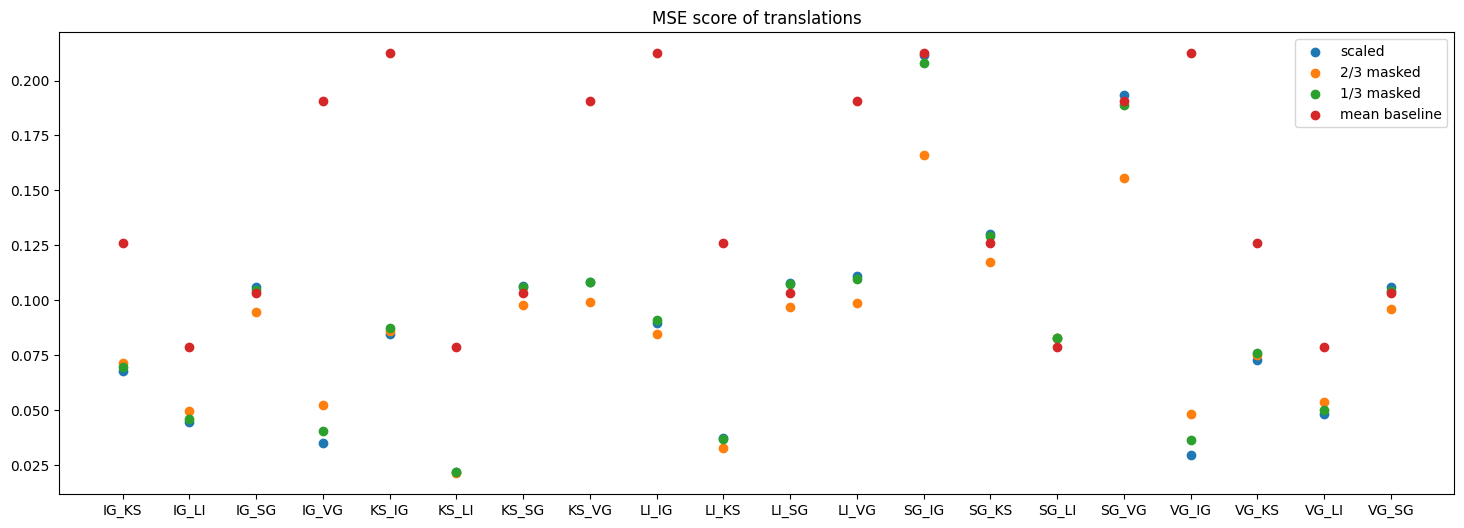

In [ ]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.numerical_evaluation import count_features_per_method, count_feature_amount, count_lime_features


In [ ]:
print(dc_bw.explanation_set['breastw_273117_11880_EPOCH-BATCH_li.pkl'][3])

In [ ]:
dc_bw.mask_features(4, 0, True)
print(count_lime_features(dc_sb.scaled_explanations[1842:2763]))

# print(count_features_per_method(dc_bw.scaled_explanations, True))
# print(count_features_per_method(dc_bw.masked_explanations, True))
# print(count_feature_amount(dc_bw.scaled_explanations[2000:3000], True))

print(count_lime_features(dc_bw.non_zero_explanations[1212:1818]))

In [ ]:
dc_spf = DataCollector('spf')
print(len(dc_spf.scaled_explanations))
print(count_lime_features(dc_spf.scaled_explanations[778:1167]))

In [ ]:
dc_btsc = DataCollector('btsc')
print(len(dc_btsc.scaled_explanations))
print(count_lime_features(dc_btsc.scaled_explanations[300:450]))

In [ ]:
import torch 


In [ ]:
dc_btsc = DataCollector('btsc')
# print(btsc['btsc_300804_11880_EPOCH-BATCH_li.pkl'])

In [ ]:
from data.preprocessing import scale_data
from data.evaluation_prep import prepare_umap_data
from evaluation.umap import visualize_umap, project_umap
import torch

In [ ]:
spambase = dc.collect_data('spambase')
keys = dc.get_keys(spambase, 1)
umap_sb = prepare_umap_data(spambase, keys, scale=True)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
umap_sb = prepare_umap_data(spambase, keys, scale=False)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
breastw = dc.collect_data('breastw')
keys = dc.get_keys(breastw, 1)
umap_bw = prepare_umap_data(breastw, keys, scale=True)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
umap_bw = prepare_umap_data(breastw, keys, scale=False)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
spf = dc.collect_data('spf')
keys = dc.get_keys(spf, 1)
umap_spf = prepare_umap_data(spf, keys, scale=True)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
umap_spf = prepare_umap_data(spf, keys, scale=False)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
btsc = dc.collect_data('btsc')
keys = dc.get_keys(btsc, 1)
umap_btsc = prepare_umap_data(btsc, keys, scale=True)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)
print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:19])

In [ ]:
umap_btsc = prepare_umap_data(btsc, keys, scale=False)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)

In [ ]:
# btsc10 = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
# print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10])
# btsc10_scaled = btsc10.clone()
# btsc10_scaled[:,-1] = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
# print(btsc10_scaled)
# # print(btsc10)
# btsc10_scaled[:, :-1] = scale_data(btsc10_scaled[:, :-1])
# print(btsc10_scaled)


In [ ]:
from data.preprocessing import mask_features


In [ ]:
btsc_test = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
btsc_test_scaled = scale_data(btsc_test)
# print(btsc_test_scaled)
# print(mask_features(btsc_test_scaled, 0, 2))
